In [1]:
%pylab inline
import sklearn

#plt.style.use('seaborn')
import seaborn as sns; sns.set()

Populating the interactive namespace from numpy and matplotlib


# 无监督学习算法之   ***聚类***

前面介绍的分类、回归算法都是属于**有监督机器学习方法**。现在我们开始介绍**无监督学习算法**。

**在无监督学习中，目标属性是不存在的（也就是只有 X 没有 y）。****

最常用的无监督学习算法有**聚类**和**降维**。

在聚类中，我们根据内部存在的数据特征，**把数据划分不同的类别**。每个类别内的数据比较相似。

### 聚类的典型应用

俗话说：“物以类聚，人以群分”，在自然科学和社会科学中，存在着大量的聚类问题。所谓类，通俗地说，就是指相似元素的集合。

**“聚类的典型应用是什么？”**

    在商务上，聚类能帮助市场分析人员从客户基本库中发现不同的客户群，并且用购买模式来刻画不同的客户群的特征。

    在生物学上，聚类能用于推导植物和动物的分类，对基因进行分类，获得对种群中固有结构的认识。
    
    聚类在地球观测数据库中相似地区的确定，汽车保险单持有者的分组，及根据房子的类型、价值和地理位置对一个城市中房屋的分组上也可以发挥作用。
    
    聚类也能用于对Web上的文档进行分类，以发现信息。
    
    到了今天，回顾我们的科学史，我们很多比较重要的就是发现一个新事物，然后给新事物分类。

当然，我们眼里所熟悉的类别，都是根据常识，已经做好的分类。对于计算机来说，更具体一些，对于这里聚类算法来说也是一样，只不过，通过算法把那些相识的数据划分在一起。这是我们本章主要解决的任务。

本章的重点是将给定的数据划分为不同的数据类别，使得类别之间的相识度最小。

### 簇的概念

前面我们讲到把数据划分为不同类别，机器学习给这个类别定义一个新的名字—**簇**。

将具有$M$个样本的数据换分为$k$个簇，必然$k<=M$。

簇满足以下条件：

* 每个簇至少包含一个对象
* 每个对象属于且仅属于一个簇
* 将满足上述条件的k个簇称为一个合理的聚类划分

### 聚类的典型要求

**可伸缩性**：许多聚类算法在小于 200 个数据对象的小数据集合上工作得很好；但是，一个大规模数据库可能包含几百万个对象，在这样的大数据集合样本上进行聚类可能会导致有偏的结果。我们需要具有高度可伸缩性的聚类算法。 [1] 

**处理不同类型数据的能力**：许多算法被设计用来聚类数值类型的数据。但是，应用可能要求聚类其他类型的数据，如二元类型(binary)，分类/标称类型（categorical/nominal），序数型（ordinal）数据，或者这些数据类型的混合。

**发现任意形状的聚类**：许多聚类算法基于欧几里得或者曼哈顿距离度量来决定聚类。基于这样的距离度量的算法趋向于发现具有相近尺度和密度的球状簇。但是，一个簇可能是任意形状的。提出能发现任意形状簇的算法是很重要的。

**用于决定输入参数的领域知识最小化**多聚类算法在聚类分析中要求用户输入一定的参数，例如希望产生的簇的数目。聚类结果对于输入参数十分敏感。参数通常很难确定，特别是对于包含高维对象的数据集来说。这样不仅加重了用户的负担，也使得聚类的质量难以控制。

**“噪声”数据的能力**大多数现实中的数据库都包含了孤立点，缺失，或者错误的数据。一些聚类算法对于这样的数据敏感，可能导致低质量的聚类结果。

**输入记录的顺序不敏感**些聚类算法对于输入数据的顺序是敏感的。例如，同一个数据集合，当以不同的顺序交给同一个算法时，可能生成差别很大的聚类结果。开发对数据输入顺序不敏感的算法具有重要的意义。

**度（high dimensionality）**个数据库或者数据仓库可能包含若干维或者属性。许多聚类算法擅长处理低维的数据，可能只涉及两到三维。人类的眼睛在最多三维的情况下能够很好地判断聚类的质量。在高维空间中聚类数据对象是非常有挑战性的，特别是考虑到这样的数据可能分布非常稀疏，而且高度偏斜。

**约束的聚类**实世界的应用可能需要在各种约束条件下进行聚类。假设你的工作是在一个城市中为给定数目的自动提款机选择安放位置，为了作出决定，你可以对住宅区进行聚类，同时考虑如城市的河流和公路网，每个地区的客户要求等情况。要找到既满足特定的约束，又具有良好聚类特性的数据分组是一项具有挑战性的任务。

**可解释性和可用性**：用户希望聚类结果是可解释的，可理解的，和可用的。也就是说，聚类可能需要和特定的语义解释和应用相联系。应用目标如何影响聚类方法的选择也是一个重要的研究课题。

# 1.1 k-means 聚类

参考：https://www.jianshu.com/p/2fa67f9bad60

思想简单，广泛使用的聚类算法。

假设输入样本为 $T=\{X_1,X_2,...,X_n\}$，算法流程为：

* 选择作为初始点的 $k$ 个**类别中心点** $a_1,a_2, ..., a_k$
* 遍历 $X_i$ ，每个 $X_i$ 被划分到离它最近的 $a_j$ 所属的类别
* 对每个类别，计算该类别内所有点的平均值，作为新的 $a_j$
* 重复以上过程，直到达到收敛条件（达到最大迭代次数、簇中心点变化微小、等） 
下面形象地演示了整个过程：


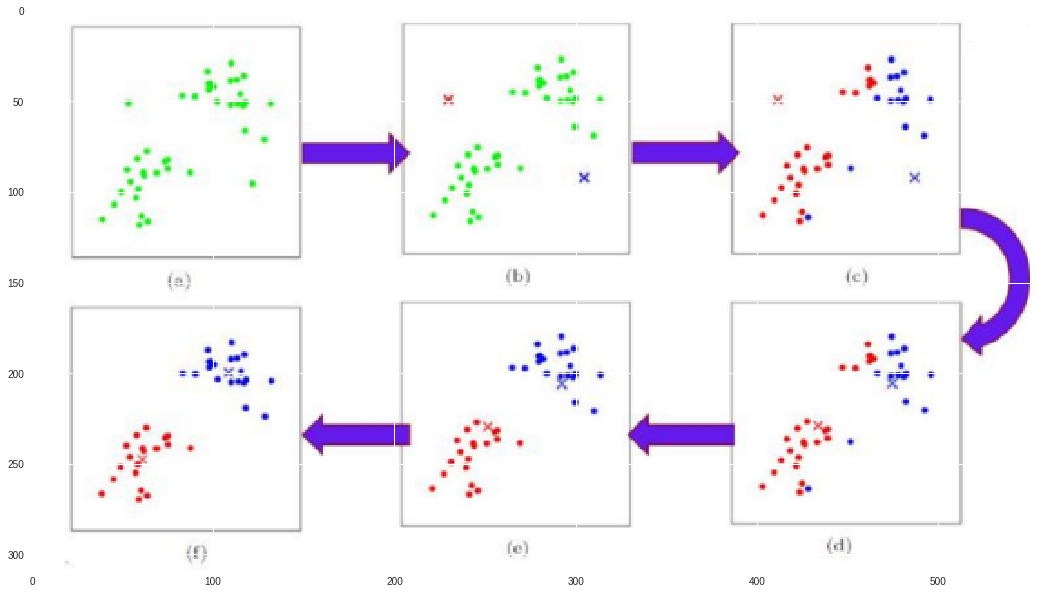

In [15]:
fig, ax = subplots(figsize=(18.4,10.3)); ax.imshow(imread('./kmeans1.png'))

### k-means 的损失函数

我们最终的目的是，调整中心点的位置，使得每个样本到中心点的距离的和最小。

所有样本到各自中心点的距离和为：

$J(a_1, a_2, ..., a_k) = \sum_{j=1}^k \sum_{i=1} ^ {N_j} (x_i - a_j)^2$

这就是 k-means 聚类的**损失函数**。

把损失函数降低到**极小值**，要求其对各个变量的偏导数为0。可以证明这等价于要求：

$a_j = \sum_{i=1}^{N_j} \frac{x_i}{N_j}$

即更新中心点为簇中所有样本平均值。

### k-means 聚类的缺点

有两个问题会很大影响K-Means算法。

1. 异常点敏感
    如果簇中存在异常点,将导致均值偏差比较严重。

    例如：一个簇中有2、4、6、8、100五个数据,那么新的中心点为24，离绝大多数点都比较远。

    在当前情况下,使用**中位数6可能比使用均值的想法更好**,使用中位数的聚类方式叫做 K-Mediods聚类(K中值聚类)
    

2. 初值敏感
    k-means算法是初值敏感的,选择不同的初始值可能导致不同的簇划分规则。
    
    为了避免这种敏感性导致的最终结果异常性,可以采用**初始化多套初始节点构造不同的分类规则,然后选择最优的构造规则**。又或者改变初始值的选择。

#### 下面给出一个初始值敏感的直观例子。给定一定的数据点如下图所示，我们明显等看到可以划分为四个区域：

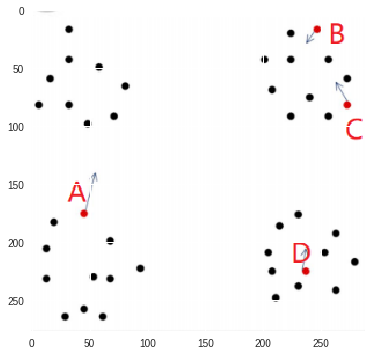

In [17]:
fig, ax = subplots(figsize=(6,6)); ax.imshow(imread('./kmeans2.png'))

#### 但是，按照上图的初始点选取，我们将把数据划分为以下4类：

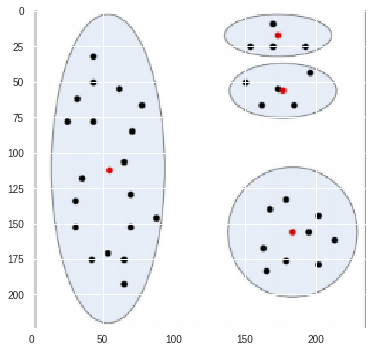

In [18]:
fig, ax = subplots(figsize=(6,6)); ax.imshow(imread('./kmeans3.png'))

### k-means 用 sklearn 实现

（以下参考 Jake Vanderplas 的教程：

（https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb ）

）

In [2]:
from sklearn import cluster
from sklearn import datasets

### 用 make_blobs 生成 4 团高斯球

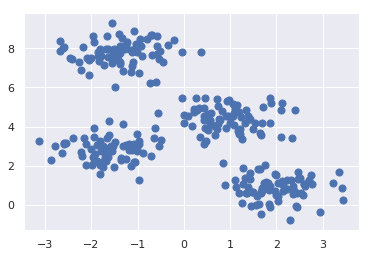

In [3]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50);

### 用 k-means 分为 4 类

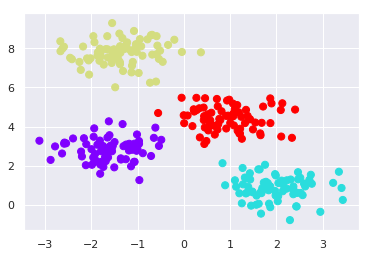

In [12]:
model = cluster.KMeans(4)
model.fit(X)
y_means = model.predict(X)
plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='rainbow')

### k-means 在 digits 的应用 
（https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb ）

For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [30]:
digits = datasets.load_digits()
model = cluster.KMeans(n_clusters=10)
clusters = model.fit_predict(digits.data)

### 即使没有标签，KMeans也能把数字分为有序的10类（除了8有点看不清）

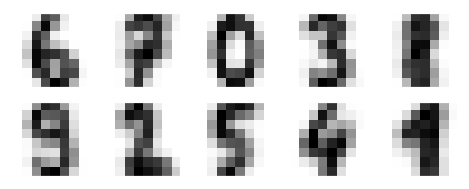

In [31]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap= cm.binary)

### 我们看看 KMeans 分类的 accuracy_score 有多少？

80% 不错啊！要知道，这可是 **无监督学习**！

In [43]:
from scipy.stats import mode

## 把每一个簇里 most common 的 target 数值挑出来，作为该簇的 target
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

### 下面是混淆矩阵

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   6   0   0 163   0   0  10   2   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   4   2   5 100  52]
 [  0  20   0   6   0   6   0   8   1 139]]


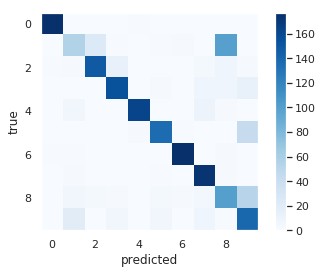

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### 举例： KMeans 作为 Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

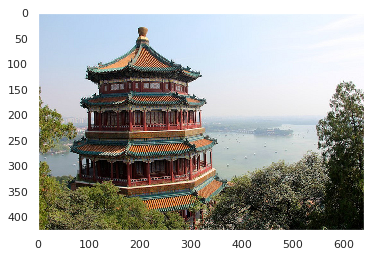

In [44]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

### The image itself is stored in a 3-dimensional array, of size (height, width, RGB):

In [45]:
china.shape

(427, 640, 3)

In [50]:
china[0]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

### We can envision this image as a cloud of points in a 3-dimensional color space. 

We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

In [48]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


### 
We now have 273,280 points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 16 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.


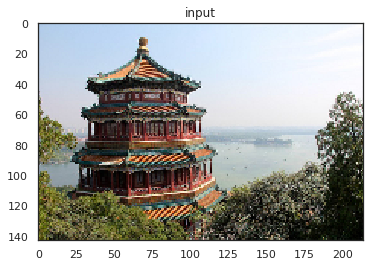

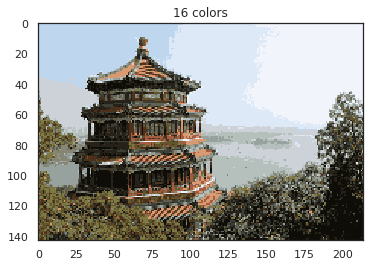

In [64]:
## reduce the size of the image for speed
image = china[::3, ::3]
#image = china
n_colors = 16

X = (image / 255.0).reshape(-1, 3)
    
model = cluster.KMeans(n_colors)
labels = model.fit_predict(X)
## 把每个簇的 center 的 color 作为新的 color
colors = model.cluster_centers_
# label 表示了该点处于哪个簇；colors[labels]就是新的 color
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

### 上面作者 Jake Vanderplas 给我们秀了一波华丽的 numpy 数组操作，大家看着学～

# 3.2 聚类评估

聚类方法怎么评估好坏呢？（这里没有标准答案的target可以比较啊！）

（以下 参考 https://blog.csdn.net/howhigh/article/details/73928635 ）

因此，有一些专业的统计方法，可以评估聚类的好坏～～～

我们介绍以下几种：

    调整兰德系数 （Adjusted Rand index）
    
    互信息评分（Mutual Information based scores）
    
    同质性Homogeneity 完整性completeness 调和平均V-measure
    
    Fowlkes-Mallows指数
    
    轮廓系数 Silhouette Coefficient
    

### 3.2.1 兰德系数(Rand index)

兰德系数需要有**已知的标签**。

假设真实的类别是$C$，聚类结果是$K$，

思想是**配对**。任取两个元素，看看它们在$C$和$K$中的分配情况是不是一致？

那么：

* $a$表示在$C$与$K$中都是同类别的**元素对**的数目
* $b$表示在$C$与$K$中都是不同类别的**元素对**的数目

则兰德指数为：

$RI = \frac{a+b}{n(n+1)/2}$

RI取值范围为[0,1]，值越大意味着聚类结果与真实情况越吻合。

### 调整兰德系数

即使两个样本为完全随机，一般RI也不为0。

因此，为了实现**“在聚类结果随机产生的情况下，指标应该接近零”**

可以定义**“调整兰德系数” ARI （adjusted Rand Index）**:

$ARI = \frac{RI - E(RI)}{\max(RI)-E(RI)}$

ARI取值范围为[-1,1]。

* 值越大意味着聚类结果与真实情况越吻合
* 随机意味着0
* 负数代表不好

ARI衡量的是两个数据分布的吻合程度。

**兰德系数的缺点为：需要有真实标签。**

In [149]:
from sklearn import metrics
from sklearn import datasets

digits = datasets.load_digits()

model = cluster.KMeans(10)

metrics.adjusted_rand_score(digits.target, model.fit_predict(digits.data))

0.6702846877378613

### 3.2.2 互信息评分（Mutual Information based scores）

互信息（Mutual Information）也是用来衡量两个数据分布的吻合程度。

假设$U$与$V$是对$N$个样本标签的分配情况，则两种分布的熵（熵表示的是不确定程度）分别为：

$H(U) = \sum_{i=1}^{|U|} P(i) \log(P(i))$

$H(V) = \sum_{j=1}^{|V|} P^\prime(j)^\prime \log(P^\prime(j))$

这里

$P(i) = |U_i|/N$, $P^\prime(j) = |V_j|/N$, 

$U$与$V$之间的互信息(MI)定义为：

${\rm MI} = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|} P(i,j) \frac{\log(P(i,j))}{P(i)P^\prime{(j)}}$

其中：

$P(i,j) = \frac{在U、V分别划分到 i、j类的样本数}{N}$



互信息(Mutual Information)是信息论里一种有用的信息度量，它可以看成是一个随机变量中包含的关于另一个随机变量的信息量。

### 调整互信息评分

一般作归一化，成为 NMI (Normalized Mutual Information)

$NMI(U,V) = \frac{MI(U,V)}{H(U)H(V)}$

与 ARI 类似，也可以定义 **调整互信息** AMI (adjusted mutual informatino)

$AMI = \frac{MI-E(MI)}{\max(H(U),H(V))-E(MI)}$

NMI取值范围为[0,1]，AMI取值范围为[-1,1]，它们都是值越大意味着聚类结果与真实情况越吻合。

**互信息评分缺点为：也需要真实标签。**

In [172]:
from sklearn import metrics
from sklearn import datasets


digits = datasets.load_digits()

model = cluster.KMeans(10)

print(metrics.adjusted_mutual_info_score(digits.target, model.fit_predict(digits.data)))
print(metrics.normalized_mutual_info_score(digits.target, model.fit_predict(digits.data)))

0.7358801237678237
0.7390978375904323


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### 当然，RI和MI也可以用作监督学习的结果评测，得分当然比无监督学习高了～

In [184]:
from sklearn import tree, ensemble
for i, model in enumerate([neighbors.KNeighborsClassifier(), ensemble.RandomForestClassifier()]):
    print('\n************\nmodel ',i, ': \n')
    model.fit(digits.data, digits.target)
    print(metrics.adjusted_rand_score(digits.target, model.predict(digits.data)))
    print(metrics.adjusted_mutual_info_score(digits.target, model.predict(digits.data)))
    print(metrics.normalized_mutual_info_score(digits.target, model.predict(digits.data)))


************
model  0 : 

0.9791786961266657


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.9765938113917956
0.976861851365094

************
model  1 : 

0.997538224685493
0.9969765488433951
0.9970105655858937


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To matc

### 3.3 轮廓系数 Silhouette Coefficient

轮廓系数适用于实际类别信息未知的情况。

#### 簇内不相似度 与  簇间不相似度

对于单个样本$i$:

* 计算样本$i$到同簇其他样本的平均距离$a_i$。

    $a_i$ 越小，说明样本$i$越应该被聚类到该簇。
    
    将$a_i$ 称为样本$i$的簇内不相似度。
    
    
* 计算样本$i$到其他某簇$C_j$的所有样本的平均距离$b_{ij}$，称为样本$i$与簇$C_j$ 的不相似度

    定义样本 $i$ 的簇间不相似度：$b_i ={\rm min}\{b_{i1}, b_{i2}, ..., b_{ik}\}$

    $b_i$ 越大，说明样本 $i$ 越不属于其他簇。

#### 单个样本轮廓系数

定义样本 $i$ 的轮廓系数为：

$s = \frac{b-a}{{\rm max}(a,b)}$

    * 如果 $s_i$ 接近 1，则说明样本 $i$ 聚类合理；

    * 如果 $s_i$ 接近-1，则说明样本 $i$ 更应该分类到另外的簇；

    * 如果 $s_i$ 近似为0，则说明样本 $i$ 在两个簇的边界上。
    
#### 所有样本轮廓系数

所有样本的 $s_i$ 的均值称为聚类结果的轮廓系数。是该聚类是否合理、有效的度量。

In [189]:
from sklearn import metrics
from sklearn import datasets


digits = datasets.load_digits()

model = cluster.KMeans(10)

print(metrics.silhouette_score(digits.data, digits.target))

print(metrics.silhouette_score(digits.data, model.fit_predict(digits.data)))
#print(metrics.normalized_mutual_info_score(digits.target, model.fit_predict(digits.data)))

0.1629432052257522
0.18241596226527537


In [190]:
from sklearn import tree, ensemble
for i, model in enumerate([neighbors.KNeighborsClassifier(), ensemble.RandomForestClassifier()]):
    print('\n************\nmodel ',i, ': \n')
    model.fit(digits.data, digits.target)
    print(metrics.silhouette_score(digits.data, model.predict(digits.data)))
    print(metrics.silhouette_score(digits.data, model.predict(digits.data)))
    print(metrics.silhouette_score(digits.data, model.predict(digits.data)))


************
model  0 : 

0.16357161245611537
0.16357161245611537
0.16357161245611537

************
model  1 : 

0.1629432052257522
0.1629432052257522
0.1629432052257522


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 作业：

    使用 make_blobs, make_circles, make_moons 生成 2-4 个簇的 500 点数据，使用 KMeans 分群：
    
        观察分群的结果，并与原始标签相对比。思考为什么 KMeans 在 circles 和 moons 的表现糟糕。

In [272]:
import scipy 
def KMeans_plot(X, y, ncenters):
    fig, axs = subplots(1,2, figsize=(14,6))
    axs[0].scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

    model = cluster.KMeans(ncenters, )
    y_predict = model.fit_predict(X)
    labels = np.zeros_like(y_predict)
    used_labels = []
    for i in range(ncenters):
        rows = (y_predict == i)
        nowlab = scipy.stats.mode(y[rows])[0]
        while nowlab in used_labels:
            nowlab+= 1 
        labels[rows] = nowlab; used_labels.append(nowlab)
    axs[1].scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    axs[0].set_title('True data', fontsize=16)
    axs[1].set_title('KMeans clusters', fontsize=16)

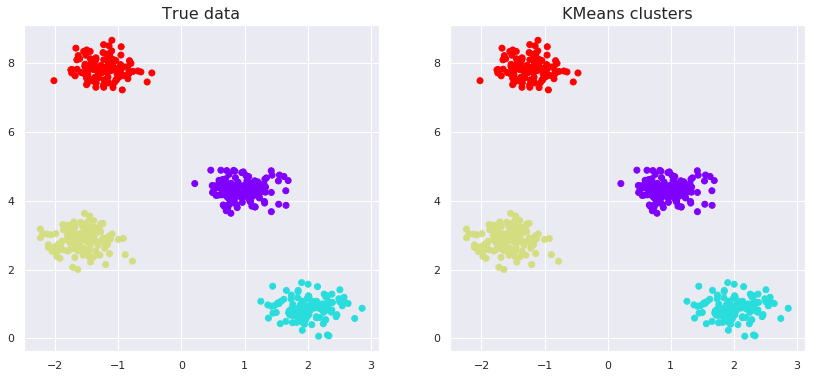

In [248]:
ncenters = 4
X, y = datasets.make_blobs(500, n_features=2, random_state=0, centers=ncenters, cluster_std=0.3)
KMeans_plot(X, y, ncenters)

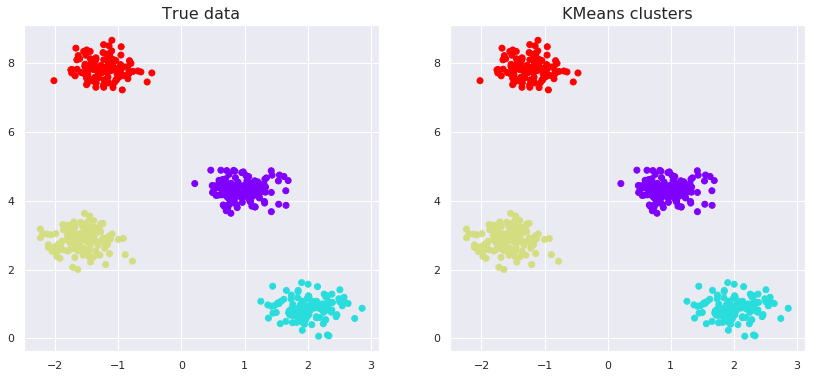

In [274]:
ncenters = 4
X, y = datasets.make_blobs(500, n_features=2, random_state=0, centers=ncenters, cluster_std=0.3)
KMeans_plot(X, y, ncenters)

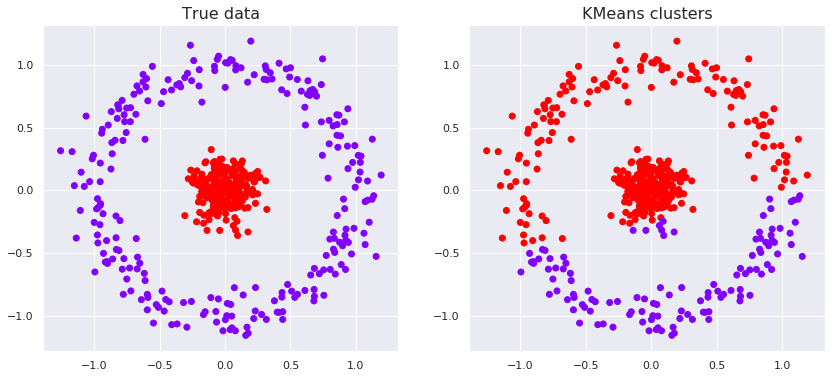

In [258]:
ncenters = 2
X, y = datasets.make_circles(500, random_state=0, factor=0.1, noise=0.1, )
KMeans_plot(X, y, ncenters)

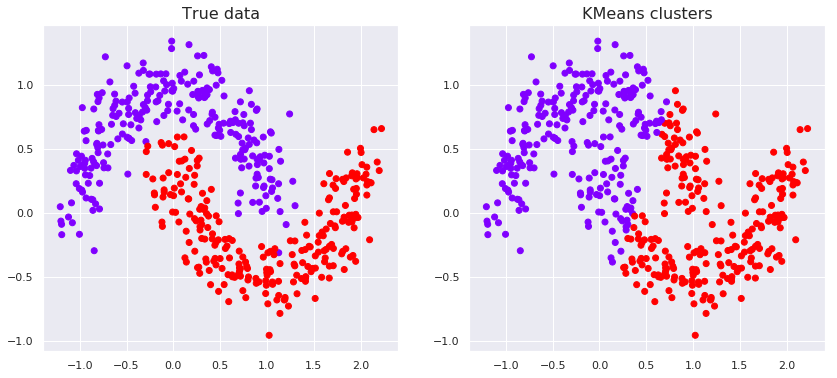

In [263]:
ncenters = 2
X, y = datasets.make_moons(500, random_state=0,  noise=0.15, )
KMeans_plot(X, y, ncenters, )